# Matplotlib

## 1. Matplotlib이 무엇인가요?

Data를 시각화 하거나, data를 Machine Learning algorithm을 이용해 상황을 예측한 결과나 정보를 찾은 결과를 시각화하는것은 중요하다.

그에 따라, 수많은 Python package 가운데, 아래와 같이 다양한 시각화 package 역시 존재한다.


* [Matplotlib](http://matplotlib.org/)
* [Bokeh](http://bokeh.pydata.org/en/latest/)
* [Seaborn](http://stanford.edu/%7Emwaskom/software/seaborn/#)
* [Lightning](http://lightning-viz.org/)
* [Plotly](https://plot.ly/)
* [Pandas built-in plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
* [HoloViews](http://holoviews.org/)
* [VisPy](http://vispy.org/)
* [pygg](http://www.github.com/sirrice/pygg)
* [Glueviz](http://www.glueviz.org/en/stable/)
* [bqplot](https://github.com/bloomberg/bqplot)

그 중, Matplotlib은 NumPy stack으로 가장 많이 사용되는 시각화 패키지 중 하나이다.

(MATLAB이라는 언어에서 파생되었다.)

## 2. 왜 Matplotlib을 사용하나요?

* **간단하게 몇 줄의 코드**로 쉽게 그래프를 그려낼 수 있다.

* 지원하는 그래프가 다양해, 원하는 그래프 모듈을 불러와서 몇 가지만 설정하면 그래프를 간단하게 그릴 수 있다.

* 기본적인 python 코드 외에도 Numpy를 사용하거나 다른 확장 모듈을 사용할 때에도 잘 호환된다.

그래서 많은 사람들이 아래와 같은 그래프를 그리기 위해서 Matplotlib을 사용한다.

<img src=https://upload.wikimedia.org/wikipedia/commons/c/ca/Mpl_screenshot_figures_and_code.png width = 640>


### 2.1 Matplotlib.externals 에러 해결

지금부터 사용할 matplotlib.pyplot 을 import을 할때 다음과 같은 에러가 나는 경우가 있다.

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Anshul\\.matplotlib\\fontList.py3k.cache'

이경우는 pyplot이 OS의 폰트를 사용하는데 OS의 폰트 경로를 잘못 인식하여 cache 파일을 제대로 만들지 못하여 발생한 에러이다.

이 에러를 해결하기 위해서는 아래와 같은 절차를 필요로 한다.

    1. Anaconda3 가 설치된 폴더로 이동한다.
    
    2. 해당 폴더 안의 lib\site-packages\matplotlib\font_manager.py 를 찾는다.
    
    3. 해당 파일에 대해서 수정을 진행해야 한다. 내용의 win32InstalledFonts() 함수를 찾는다.
    
    4. 아래의 수정부분을 해당 함수 안의 try 문에 그대로 복사해 넣고 저장을 한다.
    
     try:
            for j in range(winreg.QueryInfoKey(local)[1]):
                try:
                    key, direc, any = winreg.EnumValue( local, j)
                    if not is_string_like(direc):
                        continue
                    if not os.path.dirname(direc):
                        direc = os.path.join(directory, direc)
                    # direc = os.path.abspath(direc).lower()
                    # if os.path.splitext(direc)[1][1:] in fontext:
                    #     items[direc] = 1
                    direc = direc.split('\0', 1)[0]
                except EnvironmentError:
                    continue
                except WindowsError:
                    continue
                except MemoryError:
                    continue
            return list(six.iterkeys(items))

이러한 절차를 해결하면 정상적으로 matplotlib.pyplot가 import 될 것이다.

## 3. Matplotlib 배우기

Matplotlib은 보통 Numpy객체와 함께 쓰인다.

그래서 두 패키지를 포함하여 한번에 추가할 수 있도록 하는 pylab이라는 패키지가 있다.

그러나, pylab 패키지를 사용할 경우 너무 많은 모듈이 포함되어 namespace를 헷갈리게 하거나, built-in 함수들을 대체해버리는 등의 문제가 생겨서 요즘은 각각 import 하는것을 추천한다. 자세한 내용은 [사이트](http://nbviewer.jupyter.org/github/Carreau/posts/blob/master/10-No-PyLab-Thanks.ipynb?create=1)를 참조하자.

----------------------

Matplotlib의 Pyplot 모듈, Image 모듈, GridSpec 모듈, (tight layout 기능) 을 살펴보자.

### 3.1. Pyplot

Pyplot은 Matplotlib에서 그래프를 그리는 역할을 하는 모듈이다.

Pyplot을 이용해서 figure를 만들고, figure가 그려질 좌표를 만들고, 좌표에 몇개의 선을 그리거나, 라벨을 붙이는 등의 작업을 할 수 있다.

위에서 보여준 그래프를 그리는 방법을 알아보자.

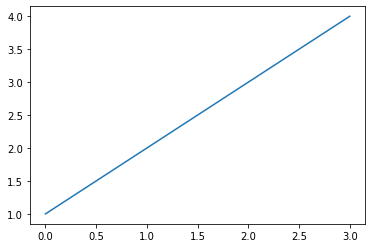

In [1]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.show()

이와 같이 매우 간단하게 그래프를 그릴 수 있었다. 아래장에서 pyplot의 기능들을 하나씩 살펴보도록 하자.

### 그래프 그리기

#### 3.1.1 show()

show() 함수는 말그대로 우리가 만든 그래프를 보여주는 역할을 한다. show()기능을 사용하지 않았을 때의 예제를 보자.

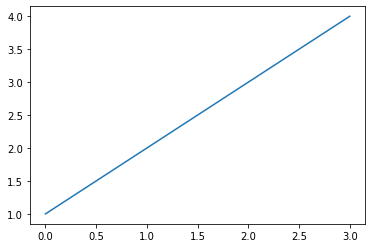

In [2]:
plt.plot([1, 2, 3, 4])

위의 예제와 같이 show()를 사용하지 않으면 plot의 반환값이 그래프가 아닌 타입 설명으로 나타나게 된다.

#### 3.1.2 Plot()

Plot()은 입력한 좌표에 맞추어서 그래프에 좌표를 입력하고 이를 이용해서 line 그래프 객체를 반환하는 함수이다. 

Plot()의 다양한 기능들에 대해서 알아보도록 하자.

-----------------

* **입력 좌표 설정**

기본적으로 Plot을 사용하기 위해서는 최소한 1개의 array형식의 입력값이 필요로 한다.

이때 NumPy를 사용할 수 있으며 NumPy를 사용하여 예시를 진행하도록 하겠다.

In [0]:
import numpy as np
x=np.array([1,2,3,4])
y=x**2

* **1차 그래프 그리기**

사용되는 입력값은 (x 좌표, y 좌표, 모양 및 색상 옵션)이다. 이때 x좌표만 적을 경우 x좌표가 아닌 y좌표로 간주하며 x 좌표는 좌표의 갯수로 적절

하게 맞춰서 제공한다. 옵션은 생략시 기본적으로 1차원 함수로 그려준다. 

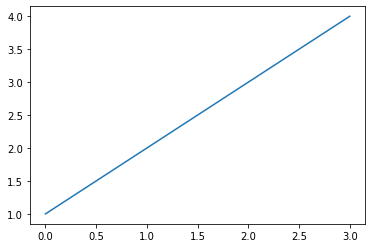

In [5]:
plt.plot(x)
plt.show()

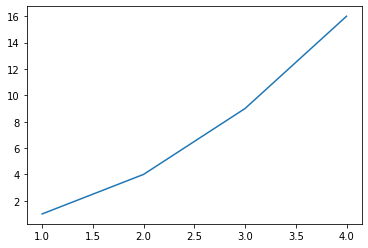

In [6]:
plt.plot(x, y)
plt.show()

* **좌표 나타내기**

그래프에 점만 나타내려면 Properties를 설정하여 뒤에 붙이면 된다.

'o'를 적을 시 점의 형태로 그래프를 그릴 수 있으며 앞에 색의 머릿글자를 입력하여 색상을 조절할 수 있다.

'ro'입력시 빨강 점들을 출력해 줄 것이다. 'bs'는 사각모양의 파란 점, 'g^'는 삼각 모양의 녹색점을 그릴 수 있다.

In [0]:
plt.plot(x,y,'ro')
plt.show()

* **격자 나타내기**

그래프에 격자를 나타내고 싶을 경우에는 grid() 함수를 사용하면 된다. True값과 False로 조절 가능하다.

In [0]:
line = plt.plot(x,x**2)
plt.grid()
plt.show()

* **여러 그래프를 동시에 나타내기**

동시에 여러 그래프를 그리려면 뒤에 그리고자 하는 그래프를 동일한 양식으로 이어나가면 된다.

In [0]:
x = np.arange(0., 5., 0.2)
plt.plot(x,x,'ro')
plt.plot(x,x**2,'b^')
plt.plot(x,x**3,'gs')
plt.show()

* **변수에 그래프 객체 저장하기**

하나의 그래프를 객체로 만들어 변수에 저장하는 방법도 가능하다.

In [0]:
line = plt.plot(x,x**2)
plt.show()

동시에 여러 객체를 만드는 것도 가능하다.

In [0]:
line1, line2 = plt.plot(x,x**2, x, x**3)
plt.show()

#### 3.1.3 setp()
* **Line properties 설정하기**

앞서의 부분에서도 일부 본 바 있지만 그래프의 모양이나 색상, 선의 굵기등을 선언해 줄 수 있다.

먼저 plot()함수 안에 인라인으로 입력하는 방법이 있다. 이때 유의해야하는 점은 기존의 그래프를 그릴때 붙였던 옵션들과 달리 그래프 전체에

적용이 된다는 점이다. 따라서 앞에서 배운 것처럼 'ro'와 같이 옵션을 먼저 앞에다 적용을 하였더라도 무시되고 적용이 되는 경우가 있다.


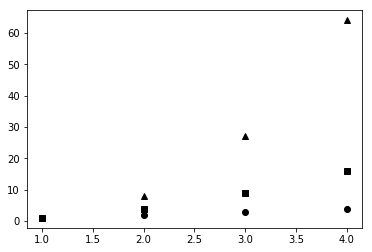

In [0]:
plt.plot(x,x,'ro', x,x**2,'bs', x,x**3,'g^', color='black')
plt.show()

이러한 문제를 해결하기 위해 setp()함수는 변수에 저장된 그래프들에 대해서 각각 properties를 지정할 수 있다.

(그래프 객체, 옵션1, 옵션2,...)으로 지정한다.

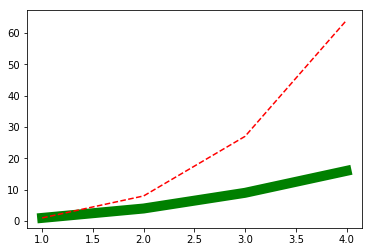

In [0]:
line1, line2 = plt.plot(x,x**2, x, x**3)

plt.setp(line1,color='green',linewidth=10.0)
plt.setp(line2,color='red',linestyle='--')
plt.show(line1,line2)

그래프의 유형에 따라서 properties들이 다르며 여기서는 2d 그래프에 대해서 자주 쓰이는 예시만을 들도록 한다.

* **선 굵기 조절**

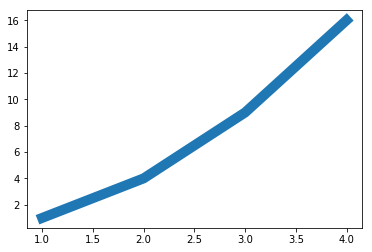

In [0]:
line1 = plt.plot(x,x**2)
plt.setp(line1, linewidth=10)
plt.show(line1)

* **선 색상 조절**

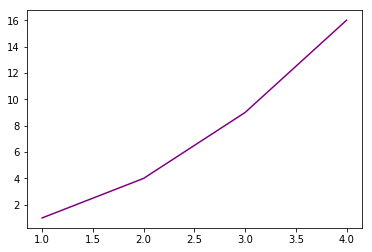

In [0]:
line1 = plt.plot(x,x**2)
plt.setp(line1, color='purple')
plt.show(line1)

* **선 모양 조절**

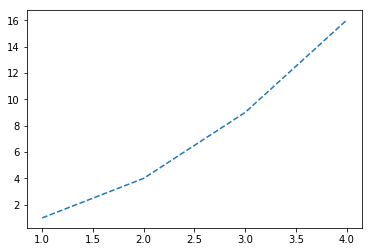

In [0]:
line1 = plt.plot(x,x**2)
plt.setp(line1, linestyle='--')
plt.show(line1)

이 외에도 각각의 그래프에 따라서 다양한 Properties들이 존재하며 이에 대해서는 필요할 때 적절하게 취사선택을 하여 사용하도록 한다.

그래프에 대해서 어떤 Properties가 있는지 확인하고 싶다면, setp()함수 안에 그래프 변수만 입력하면 된다.

In [0]:
plt.setp(line1)

지금까지 plot()함수를 통하야 2차원의 선 그래프를 그리는 것을 확인하였다. 

그렇다면 잠시 다른 함수를 이용하여 다른 모양의 다양한 그래프를 그려보도록 하자.

앞으로 나오는 함수들은 plot()함수 처럼 (x축 데이터, y축 데이터, Properties)로 입력하여 사용할 수 있다.

#### 3.1.4 bar()

흔히 알려진 bar그래프를 그려보자. 

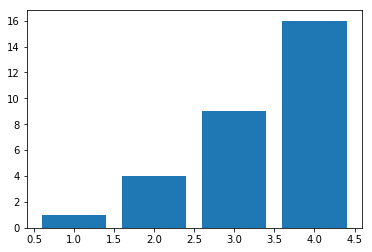

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([1,2,3,4])
y=np.array([1,4,9,16])

plt.bar(x,y)
plt.show()

#### 3.1.5 scatter()

plot()함수에서 'o' Properties를 설정해준 것과 동일한 함수이며 각 데이터를 점 형태로 그린다.

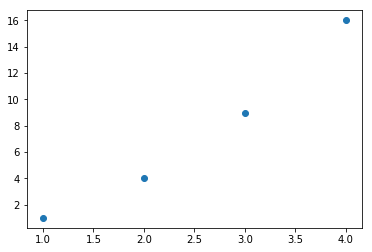

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([1,2,3,4])
y=np.array([1,4,9,16])

plt.scatter(x,y)
plt.show()

#### 3.1.6 boxplot()

중앙값, 평균, 사분위수 등과 같은 주요 통계 측정치를 시각화하는 box 그래프를 그릴 수 있는 함수이다.

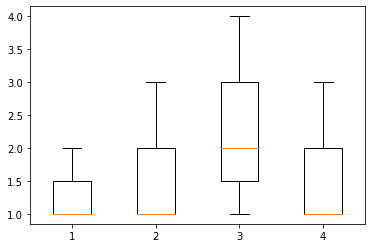

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([[1,1,1,1],[2,3,4,1],[1,1,2,3]])

plt.boxplot(x)
plt.show()

#### 3.1.7 hist2d()

도수분포를 나타내는 히스토그램 중에서 2차원의 그래프를 그릴 수 있는 함수이다.

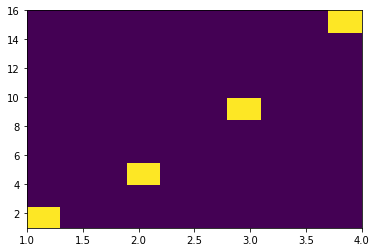

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([1,2,3,4])
y=np.array([1,4,9,16])

plt.hist2d(x,y)
plt.show()

#### 3.1.8 pie

비율을 나타낼 수 있는 원형 그래프를 그릴 수 있는 함수이다.

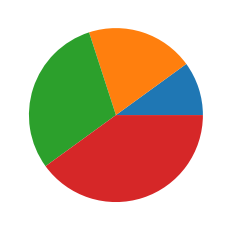

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([1,2,3,4])

plt.pie(x)
plt.show()

이 함수들에 대해서 자세한 Properties들에 대해서는 해당기능의 API를 참조하여 보다 더 자세하게 알 수 있다.

Properties들에 대한 간단하게 확인은 앞서 배운 sept()함수를 사용하여 확인할 수 있다.

### 여러개의 그래프 그리기

지금까지는 한 그래프에 모든 함수들을 그려내었다. 하지만 각각 다른 그래프인 경우 따로 그려주어야 하기 때문에 이번에는 여러개의 그래프를 그리는

방법을 확인해 보도록 하겠다.

**3.1.9 figure()**

figure는 모든 plot element 들을 담을 수 있는 최상위의 객체이다. 기본적으로 첫번째 figure(1)은 반드시 실행이 되며 특별히 입력할 필요는 없다.

다른 figure를 생성하고 싶다면 figure()함수에 원하는 번호의 숫자를 넣어서 생성하도록 한다.

In [0]:
plt.figure(2)

** 3.1.10 subplot()**

subplot()함수는 plot 하기 전에 함수가 어느 figure에 담길 것인지와 그래프의 크기를 설정할 수 있다.

subplot() 함수에는 입력값으로 가로로 표시될 그래프 갯수 numrows, 세로로 표시될 그래수 갯수 numcols, 총 그래프 갯수 figurenum을 받는다.

여기서 figurenum은 1보다 크고 numrows x numcols 보다 작아야 한다. 만일 각각의 입력값이 1보다 크고 10보다 작다면 세자리 수로 입력이 가능하다. 

보다 쉽게 이해하기 위하여 아래는 하나의 figure 안에 4개의 그래프를 2 by 2의 형식으로 그렸다.

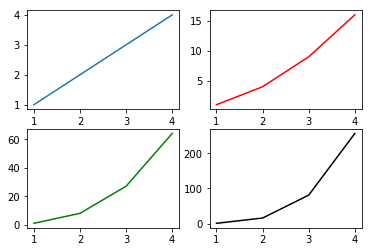

In [0]:
plt.figure(3)
plt.subplot(2,2,1)
plt.plot(x,x)
plt.subplot(2,2,2)
plt.plot(x,x**2, color='red')
plt.subplot(2,2,3)
plt.plot(x,x**3, color='green')
plt.subplot(2,2,4)
plt.plot(x,x**4, color='black')

plt.show()

### **그래프에 글씨 추가하기**

현재까지 그래프를 생성하는 것을 확인하였다. 여기에 그래프에 설명을 추가하여 그래프가 보다 더 보기 좋도록 만들어 보도록 하겠다.

**3.1.11 title()**

그래프에 제목을 넣기 위해서는 title()라는 함수를 사용한다. 입력값으로 원하는 문자열을 넣는다.

In [0]:
line1, line2, line3 = plt.plot(x,x,'ro', x,x**2,'bs', x,x**3,'g^')
plt.title('x, square(x), cubic(x)')
plt.show()

**3.1.12 xlabel(), ylabel()**

그래프 x축에 라벨을 넣으려면 xlabel()을, y축에는 ylabel()함수를 사용한다. 둘 다 입력값으로 원하는 문자열을 넣는다.

In [0]:
line1, line2, line3 = plt.plot(x,x,'ro', x,x**2,'bs', x,x**3,'g^')
plt.title('x, square(x), cubic(x)')
plt.xlabel('x area')
plt.ylabel('y area')
plt.show()

** 라벨 옵션 설정**

각각의 라벨들의 글자 크기나 글자 색을 넣고자 한다면, Properties들을 뒤에 추가하도록 한다.

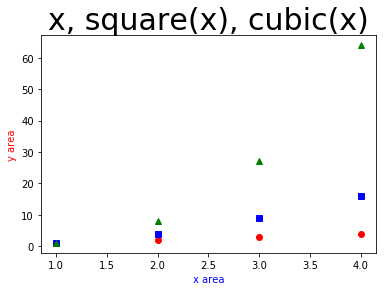

In [0]:
line1, line2, line3 = plt.plot(x,x,'ro', x,x**2,'bs', x,x**3,'g^')
plt.title('x, square(x), cubic(x)', fontsize=30.0)
plt.xlabel('x area', color='blue')
plt.ylabel('y area', color='red')
plt.show()

**3.1.13 annotate()**

특별한 값에 대해서 이를 가리키는 라벨을 포함하려면 annotate()함수를 사용한다. 입력값으로 문자열, 좌표, 문자가 표시될 좌표, 화살표 Properties 를 받는다.

Properties에는 글자크기, 화살표의 굵기 등을 설정할 수 있다.

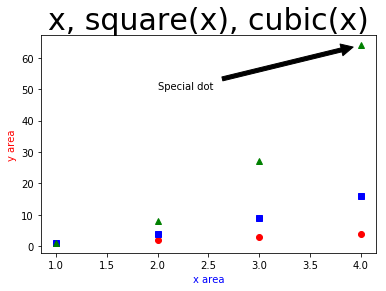

In [0]:
line1, line2, line3 = plt.plot(x,x,'ro', x,x**2,'bs', x,x**3,'g^')
plt.title('x, square(x), cubic(x)', fontsize=30.0)
plt.xlabel('x area', color='blue')
plt.ylabel('y area', color='red')
plt.annotate('Special dot', xy=(4,64), xytext=(2,50),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

**3.1.14 xscale(), yscale()**

Matplotlib에서는 기본적으로 축들의 범위를 맞춰주지만 천문학적으로 큰 값들에 제대로 표현을 하지 못할 때가 있다.

이럴 경우에 대해서 xscale() 또는 yscale() 기능을 사용하면 각 축들에 표시되는 값들을 조정할 수 있다.

대표적으로 log, linear, symmetric log, logit을 지원한다.

예시로 매우 큰 값을 표현하는데 자주 사용되는 log으로 변환하여 나타내 보도록 하겠다. 기능을 사용하지 않았을 때와 비교해보자.

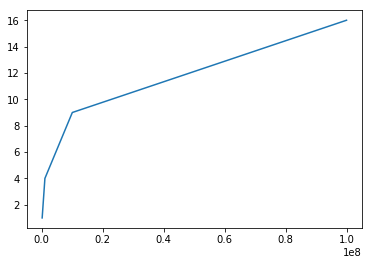

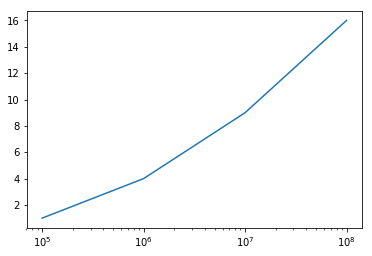

In [0]:
x=np.array([10**5,10**6,10**7,10**8])
y=np.array([1,4,9,16])
plt.figure(1)
line1 = plt.plot(x, y)
plt.figure(2)
line2 = plt.plot(x,y)
plt.xscale('log')
plt.show()

log 외에 대해서도 필요한 조건이 있으면 사용자가 원하는 대로 수정이 가능하다. 이에 대해서는 관련 문서를 참고하도록 한다.

### 3.2 Image

그래프를 그리는 패키지에서 이미지를 불러올 수 있다는 점에서 의문을 가질 수 있다.

하지만 이미지도 하나의 점인 픽셀들로 구성되어 있는 점을 생각해 볼때 각자의 픽셀들을 그래프위에 좌표에 맞춰서 나타난다고 생각하면 이해가 될 것이다.

그렇다면 지금부터는 Matplotlib을 통하여 이미지를 불러오는 방법을 확인해 보도록 하겠다.

* **Jupyter(Ipython)에서의 출력 설정**

이미지를 불러올 때는 따로 다른 창에서 출력이 되기 때문에 Jupyter에서는 제대로 출력이 되지 않는 경우가 있다.

이를 위해서는 Jupyter에서 입력이 포함되도록 설정을 진행해주어야 한다.

In [0]:
%matplotlib inline

해당 명령어는 기존의 결과들 처럼 이미지 출력도 Jupyter 상에서 출력되도록 설정을 해주는 역할을 한다.

그렇다면 간단한 이미지를 출력해 보도록 하자.

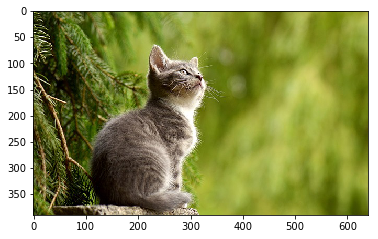

In [0]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img=mpimg.imread('cat.jpg')
imgshow=plt.imshow(img)

이와 같이 정상적으로 그래프 형식으로 이미지를 확인할 수 있다. 지금부터 image의 기능을 하나씩 살펴보도록 하자.

**3.2.1 imshow() 사용하기**

위의 결과를 보면 pyplot를 사용하여 이미지를 그렸음을 확인할 수 있다.

그렇다면 imshow()를 사용하지 않으면 어떻게 되는 것일까? 한번 생김새를 확인해 보도록 하자.

In [0]:
img

array([[[ 35,  35,  23],
        [ 65,  65,  37],
        [ 45,  49,   0],
        ..., 
        [159, 163,  53],
        [159, 163,  53],
        [159, 163,  53]],

       [[ 10,  15,   0],
        [ 20,  25,   3],
        [ 32,  35,  14],
        ..., 
        [159, 163,  53],
        [160, 164,  54],
        [160, 164,  54]],

       [[105, 119,  83],
        [ 55,  68,  40],
        [ 30,  39,  22],
        ..., 
        [161, 165,  54],
        [162, 166,  55],
        [162, 166,  55]],

       ..., 
       [[ 23,  44,   0],
        [ 44,  66,   2],
        [ 63,  86,  18],
        ..., 
        [ 84,  94,   7],
        [ 85,  95,   8],
        [ 86,  96,   9]],

       [[ 25,  45,   0],
        [ 33,  55,   0],
        [ 67,  90,  22],
        ..., 
        [ 83,  93,   6],
        [ 84,  94,   8],
        [ 85,  95,   9]],

       [[ 28,  48,   0],
        [ 33,  55,   0],
        [ 66,  89,  21],
        ..., 
        [ 81,  91,   5],
        [ 82,  92,   6],
        [ 83,  93,

위의 결과를 분석하면 NumPy array 모양이 출력되었음을 확인할 수 있다. 그렇다면 이 구조는 어떻게 되는 것일까?

각 픽셀들에는 r, g, b 총 3개의 값을 가지고 있다. 이것이 하나의 array로 구성되어서 1개의 픽셀을 나타내게 된다.

또한 픽셀들이 모여 가로의 픽셀 한 줄을 array로 구성하였고 이들을 가지고 있다.

이에 대해서 아래의 결과를 보면 더욱 확실하게 알 수 있다. 이의 고양이 이미지는 640 x 390의 그림이다.

이에 대해 가로 한줄의 길이와 몇개의 줄이 있는지 한번 확인해 보도록 하자.

In [0]:
print(len(img[0]))
print(len(img))

640
390


한줄에 대해서 출력시 이미지 가로 크기에 맞게 640이 나옴을 확인할 수 있다. 또한 이러한 줄들이 390줄이 있음을 확인할 수 있다.

* **Pseudocolor(의사색체) 표현하기**

Pseudocolor(의사색체)는 픽셀의 각 농도 레벨에 따라 색상을 부여함으로써 농도차이를 보다 쉽게 확인할 수 있도록 만든다.

이를 위해서는 r,g,b 중 한개만을 사용하면 되므로  한개에 대해서 나타내 보도록 하자.

이를 위해서는 NumPy의 기술중 Slicing을 알아야 한다. 이에 대해서 정확히 기억이 나지 않는다면 다시 확인해 보고 오도록 하자.

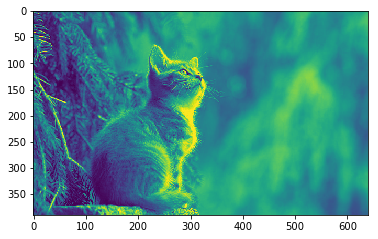

In [0]:
pseu_img = img[:,:,0]
plt.imshow(pseu_img)

기본적으로 녹색에 기반된 색상을 바뀌며 이를 viridis 로 표현된다. 이는 다른색으로도 변환이 가능하다. 이를 변환하려면 Properties 중 cmap을 사용한다.

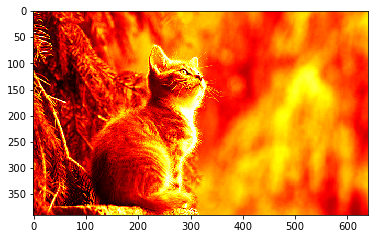

In [0]:
plt.imshow(pseu_img, cmap="hot")

cmap을 설정하는 방법은 따로 함수로도 사용할 수 있다.

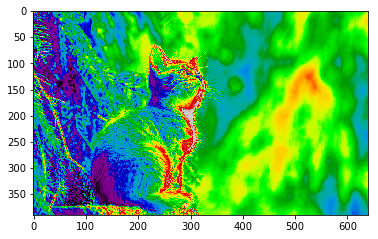

In [0]:
imgplot = plt.imshow(pseu_img)
imgplot.set_cmap('nipy_spectral')

이 외에도 다양한 cmap의 설정값들이 있으며 이에 대해서는 적절한 것을 찾아 취사선택 하도록 한다.

**3.2.2 colorbar()**

어떤 색상에 대해서 수치가 높고 낮음을 그라데이션으로 표시해주는 색상 그라데이션 막대를 표시할 수 있다.

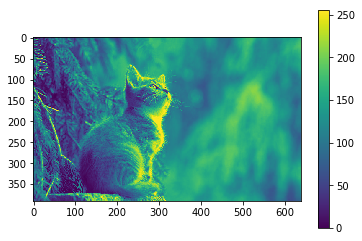

In [0]:
imgplot = plt.imshow(pseu_img)
plt.colorbar()

**3.2.3 thumbnail()**

이미지 크기는 이미 고정되어 있으며 Matplotlib에서 파일 자체를 직접적으로 조절할 수 없다. 하지만 PIL 패키지를 사용하여 불러온 이미지를 수정할 수 있다.

이때 이미지가 수정될 경우 일부 데이터를 손실될 수 있으므로 이에 대해서 잃어버린 내용을 채우는 보간 작업을 진행하여야 한다.

PIL 패키지의 thumbnail()함수를 사용하여 크기를 조절하였고 보간작업을 진행하도록 하였다.

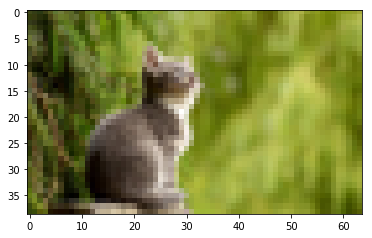

In [0]:
from PIL import Image
img = Image.open('cat.jpg')
img.thumbnail((64, 64), Image.ANTIALIAS)
imgplot = plt.imshow(img)

이미지를 64 x 64크기로 수정을 하도록 하였고 보간작업을 'ANTIALIAS' 모드로 진행하여 이미지를 모자이크한 모양처럼 작업하였다.

보간 작업에 대한 설정은 다른 설정도 존재한다.

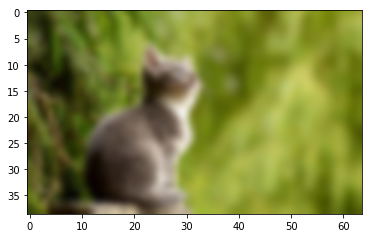

In [0]:
imgplot = plt.imshow(img, interpolation="bicubic")

이외의 다른 설정들에 대해서는 공식 사이트를 참조하도록 한다.

### 3.3 GridSpec

앞서 Pyplot 장에서 여러 그래프를 나타낼수 있도록 하는 figure와 subplot 개념을 보았다.

GridSpec은 상대적으로 제약이 많은 subplot 부분을 보완하여 여러 그래프를 구역으로 나누어서 표시할 수 있도록 한다.

|Cell 1 |Cell 2  |
|:-----|:-----|
|**Cell 3** |**Cell 4**  |

위의 표와 같이 Grid를 정의하고 그래프들을 각 Cell 안에 넣어서 표시한다.

**3.3.1 subplot2grid()**

앞서 본 subplot 함수 한개를 보자.

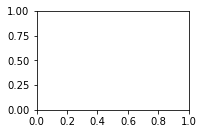

In [0]:
sub = plt.subplot(2, 2, 1)

subplot은 앞에서 공부한 것 처럼 figure안에 아래와 같은 표처럼 Grid를 정의하고 그중 1번째인 Cell 1에 저장하겠다는 의미이다.

|Cell 1 |Cell 2  |
|:-----|:-----|
|**Cell 3** |**Cell 4**  |

그렇다면 동일한 기능을 subplot2grid()를 사용하여 표현해보자.

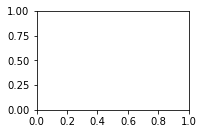

In [0]:
sub = plt.subplot2grid((2, 2), (0, 0))

입력값을 보면 (2,2)는 2 by 2 모양의 그리드를 정의하였다. 그리고 (0,0) 은 Cell 1 을 의미한다. 

subplot2grid()는 subplot()과 달리 list나 array의 index 방식처럼 0부터 시작하기 때문에 이런 문법을 사용한다.

따라서 아래의 표처럼 indexing을 사용할 수 있다.

|(0,0) |(0,1) |
|:-----|:-----|
|**(1,0)** |**(1,1)**  |

아래의 모습은 2 by 2 grid로 그래프를 표현하였다.

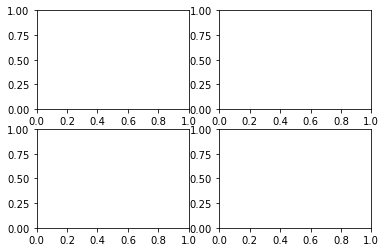

In [0]:
sub1 = plt.subplot2grid((2, 2), (0, 0))
sub2 = plt.subplot2grid((2, 2), (0, 1))
sub3 = plt.subplot2grid((2, 2), (1, 0))
sub4 = plt.subplot2grid((2, 2), (1, 1))

**행 / 열 병합**

subplot2grid()에서는 grid안의 Cell 들을 병합할 수 있으며 이는 HTML처럼 rowspan, colspan Properties를 설정하여 사용할 수 있다.

rowspan은 행을 병합을 하고 colspan은 열을 병합한다. 아래의 예제는 rowspan과 colspan을 둘 다 사용하여 나타낸 모습니다.

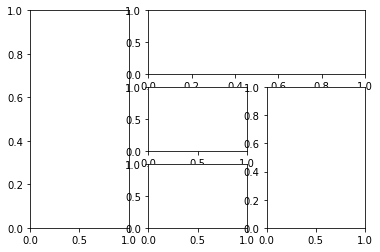

In [0]:
grid1 = plt.subplot2grid((3, 3), (0, 0), rowspan=3)
grid3 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
grid2 = plt.subplot2grid((3, 3), (1,1))
grid4 = plt.subplot2grid((3, 3), (2, 1))
grid5 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)

* **GridSpec 사용하기**

subplot2grid() 함수를 사용하는 것을 보았지만 이는 pyplot에 속해있는 함수이다.

pyplot외에 이런 기능을 보다 전문적으로 지원하는 패키지인 GridSpec를 사용하여 동일한 기능을 구현해보자.

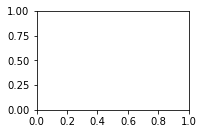

In [0]:
import matplotlib.gridspec as gridspec
grs = gridspec.GridSpec(2, 2)
graph1 = plt.subplot(grs[0, 0])

앞서 subplot2grid()에서는 grid의 모양과 그래프를 넣을 Cell을 직접적으로 inline으로 적었다,

하지만 GridSpec에서는 Grid를 정의하고 이를 변수에 저장한다. 이후 그래프에 subplot을 사용하여 Cell에 그래프를 저장한다.

GridSpec는 array 형식처럼 사용할 수 있기 때문에 NumPy에서 사용하는 방식처럼 사용이 가능하다.

아래는 NumPy의 slicing을 사용하는 코드이다.

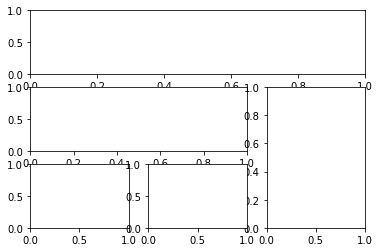

In [0]:
grs = gridspec.GridSpec(3, 3)
graph1 = plt.subplot(grs[0, :])
graph2 = plt.subplot(grs[1, :-1])
graph3 = plt.subplot(grs[1:, -1])
graph4 = plt.subplot(grs[-1, 0])
graph5 = plt.subplot(grs[-1, -2])

* **GridSpec 모양 바꾸기**

GridSpec의 모양을 변경할 수 있다. 이를 위해서 update() 함수를 사용할 수 있다. 함수안에는 Properties들을 설정할 수 있다.

대표적인 Properties로 left,right 는 GridSpec의 가로, 세로의 크기를 지정하며 left는 right보다 반드시 작아야 한다.

wspace, hspace는 가로, 세로 간의 간격을 설정해 줄 수 있다.

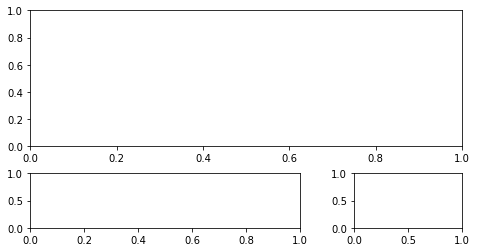

In [0]:
grs1 = gridspec.GridSpec(3, 3)
grs1.update(left=9, right=10, hspace=0.5, wspace=0.5)
graph1 = plt.subplot(grs1[:-1, :])
graph2 = plt.subplot(grs1[-1, :-1])
graph3 = plt.subplot(grs1[-1, -1])

* **GridSpec에 SubplotSpec 사용하기**

GridSpec 만을 사용할 수 있지만 SubplotSpec와도 호환이 가능하다.

GridSpec으로 row와 column 갯수를 선언해주면, 그 안에 subplot들이 들어가는 구조이다.

In [0]:
grs = gridspec.GridSpec(1, 2)

grs1 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=grs[0])
grs2 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=grs[1])

* **GridSpec 셀 간격 조절**

기본적으로 GridSpec 안의 셀의 그래프들은 모두 크기가 동일하게 조정되어 있다.

width_ratios와 height_ratios를 사용하면 이들을 비례 관계에 맞추어서 조절할 수 있다. 입력값은 비례관계가 입력된 array를 사용한다.

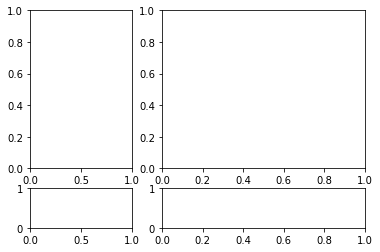

In [0]:
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1, 2],
                       height_ratios=[4, 1]
                       )

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

## 이번 장은 여기까지로 한다.